##### - Estudo feito pelo Hashtag Treinamentos, com a base de dados do Arbienb retida do kaggle.
Bruno Souza - DS

# Prevendo o preço do aluguel em São Paulo
- A empresa HashMoveis contratou você para ajudar a decidir em quais imóveis investir
    - Para isso, precisamos **prever qual seria o aluguel desse imóvel pelo airbnb** e investir nos imóveis que vão **trazer um retorno mais rápido do investimento**

As principais etapas de um projeto de Ciência de Dados são:
1. [Definição do problema](#definicao)
2. [Entendimento e tratamento dos dados](#dados)
3. [Análise Exploratória](#eda)
4. [Tratamento dos Dados](#tratamento)
5. [Definição do modelo](#modelo)
6. [Modelo em produção](#producao)

<a id='definicao'></a>
## Definição do problema

- Para entender o problema, algumas perguntas são fundamentais:
    - De forma direta: **"Qual problema eu quero resolver?"**
    - Quais são minha métricas de sucesso?
    - Qual o prazo desejado para esse projeto?
    - Quem são os interessados nesse resultado?
    - Quais são os **dados** disponíveis

<a id='dados'></a>
## Entendimento e tratamento dos dados
- Vamos utilizar o **pandas** para nos ajudar em todas essa etapa de entendimento dos dados
    - https://pandas.pydata.org/
- Para esse problema, vamos usar a seguinte base de dados:
    - https://www.kaggle.com/datasets/dantebarros/transformed-data-from-quinto-andars-platform
- Precisamos entender os dados disponíveis!

In [2]:
# Importando a base
import pandas as pd

In [3]:
# Importando uma base de dados utilizando o pandas
base = pd.read_csv("quinto_andar_transformed_data.csv")

In [4]:
base.head()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,https://www.quintoandar.com.br/imovel/89334069...,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,https://www.quintoandar.com.br/imovel/89333859...,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,https://www.quintoandar.com.br/imovel/89337700...,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


In [5]:
# Verificando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2775 entries, 0 to 2774
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              2775 non-null   object 
 1   bairro           2775 non-null   object 
 2   aluguel          2775 non-null   float64
 3   condominio       2768 non-null   float64
 4   iptu             2767 non-null   float64
 5   seguro_incendio  2775 non-null   float64
 6   taxa_serviço     2775 non-null   float64
 7   total            2775 non-null   float64
 8   metragem         2775 non-null   float64
 9   quarto           2775 non-null   float64
 10  banheiro         2775 non-null   float64
 11  vaga_carro       2775 non-null   float64
 12  andar            2775 non-null   float64
 13  aceita_pet       2775 non-null   float64
 14  mobilia          2775 non-null   float64
 15  metro_prox       2775 non-null   float64
dtypes: float64(14), object(2)
memory usage: 347.0+ KB


In [6]:
# Verificando valores nulos
base.isnull()

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2771,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Somando valores nulos
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         7
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [8]:
# Filtrando valores
base[base.bairro == 'Liberdade']

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,https://www.quintoandar.com.br/imovel/89332996...,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
3,https://www.quintoandar.com.br/imovel/89337065...,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
21,https://www.quintoandar.com.br/imovel/89336421...,Liberdade,600.0,334.0,0.0,8.0,12.0,954.0,60.0,1.0,1.0,0.0,10.0,1.0,0.0,1.0
43,https://www.quintoandar.com.br/imovel/89336704...,Liberdade,1200.0,356.0,60.0,16.0,24.0,1656.0,50.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0
65,https://www.quintoandar.com.br/imovel/89299049...,Liberdade,600.0,378.0,24.0,8.0,12.0,1022.0,33.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,https://www.quintoandar.com.br/imovel/89325487...,Liberdade,1080.0,180.0,21.0,14.0,21.0,1316.0,25.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2716,https://www.quintoandar.com.br/imovel/89292341...,Liberdade,1200.0,310.0,0.0,16.0,24.0,1550.0,40.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2745,https://www.quintoandar.com.br/imovel/89333914...,Liberdade,2500.0,335.0,167.0,32.0,50.0,3084.0,90.0,3.0,3.0,0.0,7.0,1.0,0.0,0.0
2756,https://www.quintoandar.com.br/imovel/89337772...,Liberdade,911.0,376.0,51.0,12.0,18.0,1368.0,40.0,1.0,1.0,0.0,4.0,1.0,0.0,1.0


In [9]:
# Podemos acessar e verificar os anúncios
base.url[987]

'https://www.quintoandar.com.br/imovel/892886896?house_tags=rentPriceDecreased&search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A1691%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

**Nesse caso, entendemos que valores como condomínio nulo são registros de casas que realmente não possuem condomínio**
- Podemos então substituir esses valores por 0

In [10]:
# Filtrando Valores do condominio
base[base.condominio.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
987,https://www.quintoandar.com.br/imovel/89288689...,Bela Vista,2960.0,NaN,125.0,49.0,59.0,3193.0,100.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
1391,https://www.quintoandar.com.br/imovel/89310205...,Perdizes,5200.0,NaN,1030.0,86.0,104.0,6420.0,220.0,3.0,3.0,1.0,0.0,1.0,0.0,0.0
1527,https://www.quintoandar.com.br/imovel/89310896...,Aclimação,3000.0,NaN,158.0,50.0,60.0,3268.0,90.0,3.0,1.0,1.0,0.0,1.0,0.0,1.0
1801,https://www.quintoandar.com.br/imovel/89284189...,Ipiranga,2600.0,NaN,100.0,43.0,52.0,2795.0,100.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
2287,https://www.quintoandar.com.br/imovel/89288795...,Ipiranga,1000.0,NaN,80.0,17.0,20.0,1117.0,25.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0
2387,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2751,https://www.quintoandar.com.br/imovel/89288796...,Ipiranga,1375.0,NaN,100.0,23.0,27.0,1525.0,50.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# Selecionando apenas a coluna condominio
base.loc[base.condominio.isnull(),'condominio']

987    NaN
1391   NaN
1527   NaN
1801   NaN
2287   NaN
2387   NaN
2751   NaN
Name: condominio, dtype: float64

In [12]:
# Substituindo valores nulos por 0
base.loc[base.condominio.isnull(),'condominio'] = 0

In [13]:
# Verificando novamente os valores nulos
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               8
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [14]:
# Repetindo o mesmo processo para o IPTU
base[base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [15]:
# Acessando o anúncio pela url
base.url[321]

'https://www.quintoandar.com.br/imovel/892783321?search_rank=%7B%22sortMode%22%3A%22relevance%22%2C%22searchMode%22%3A%22list%22%2C%22resultsOrigin%22%3A%22search%22%2C%22rank%22%3A904%2C%22personalization%22%3Atrue%7D&search_id=%224bf69054f19a11eb87180a0adc3b16b0%22&from_route=%22search_results%22'

**Nesse caso, entendemos que valores nulos do IPTU, são de links que não estão ativos**
- Podemos então excluir essas linhas

In [16]:
# Verificando quantas linhas temos na base
base[base.iptu.isnull()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
321,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
580,https://www.quintoandar.com.br/imovel/89276781...,Aclimação,1500.0,477.0,NaN,20.0,30.0,2027.0,67.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0
732,https://www.quintoandar.com.br/imovel/89277791...,Vila Olímpia,3700.0,0.0,NaN,47.0,74.0,3821.0,60.0,1.0,1.0,1.0,15.0,0.0,0.0,0.0
1348,https://www.quintoandar.com.br/imovel/89277231...,Consolação,2696.0,1033.0,NaN,35.0,53.0,3882.0,88.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
1486,https://www.quintoandar.com.br/imovel/89279154...,Jardim Paulista,6750.0,1400.0,NaN,86.0,135.0,8371.0,90.0,1.0,2.0,2.0,4.0,0.0,1.0,1.0
1709,https://www.quintoandar.com.br/imovel/89281155...,Aclimação,3000.0,1100.0,NaN,39.0,60.0,4199.0,100.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
2209,https://www.quintoandar.com.br/imovel/89278332...,Jardim Paulista,3530.0,1000.0,NaN,45.0,70.0,4723.0,75.0,1.0,2.0,1.0,10.0,1.0,0.0,1.0
2659,https://www.quintoandar.com.br/imovel/89279454...,Bela Vista,906.0,267.0,NaN,12.0,18.0,1203.0,27.0,1.0,1.0,0.0,14.0,0.0,0.0,1.0


In [17]:
# Podemos excluir essas linhas que estão sem valor de iptu
base = base.dropna(axis=0) # axis=0 é para excluir as linhas

In [18]:
# Verificando com quantas linhas ficamos agora na base
base.shape

(2767, 16)

In [19]:
# Para finalizar, podemos apenas garantir que não temos valores nulos
base.isnull().sum()

url                0
bairro             0
aluguel            0
condominio         0
iptu               0
seguro_incendio    0
taxa_serviço       0
total              0
metragem           0
quarto             0
banheiro           0
vaga_carro         0
andar              0
aceita_pet         0
mobilia            0
metro_prox         0
dtype: int64

In [20]:
# Selecionando uma coluna específica dessa base
base.url

0       https://www.quintoandar.com.br/imovel/89332996...
1       https://www.quintoandar.com.br/imovel/89334069...
2       https://www.quintoandar.com.br/imovel/89333859...
3       https://www.quintoandar.com.br/imovel/89337065...
4       https://www.quintoandar.com.br/imovel/89337700...
                              ...                        
2770    https://www.quintoandar.com.br/imovel/89282425...
2771    https://www.quintoandar.com.br/imovel/89336040...
2772    https://www.quintoandar.com.br/imovel/89292613...
2773    https://www.quintoandar.com.br/imovel/89336592...
2774    https://www.quintoandar.com.br/imovel/89294786...
Name: url, Length: 2767, dtype: object

**Para o nosso modelo, essa coluna não vai ser importante. Então podemos eliminar toda a coluna**

In [21]:
# Eliminando essa coluna
base = base.drop('url', axis=1)

In [22]:
# Verificando com quantas colunas ficamos agora na base
base.shape

(2767, 15)

<a id='eda'></a>
## Análise Exploratória de Dados
- Nessa etapa, nós vamos explorar a nossa base
- Vamos continuar usando o **pandas**

In [23]:
# Visualizando a base
base.head()

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0


In [24]:
# Resumo estatístico
base.describe()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000
mean,2276.430430,596.070473,283.561980,29.923021,45.325985,3232.463679,63.759668,1.593784,1.398265,0.627033,5.924828,0.775208,0.202024,0.733647
std,1327.758115,430.433379,9424.657082,17.660109,26.584522,9600.842536,38.680371,0.748924,0.686907,0.674153,5.000881,0.417521,0.401582,0.442131
min,500.000000,0.000000,0.000000,7.000000,10.000000,697.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1400.000000,330.000000,0.000000,18.000000,28.000000,1876.000000,40.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,1950.000000,520.000000,55.000000,26.000000,39.000000,2615.000000,52.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,1.000000
75%,2735.000000,800.000000,140.000000,36.000000,54.000000,3751.000000,76.000000,2.000000,2.000000,1.000000,9.000000,1.000000,0.000000,1.000000
max,11250.000000,3300.000000,495800.000000,187.000000,225.000000,499600.000000,587.000000,5.000000,7.000000,6.000000,43.000000,1.000000,1.000000,1.000000


**Exercícios estatísticos**

In [25]:
# Somando todos os valores de aluguel
base.aluguel.sum()

6298883.0

In [26]:
# Contando a quantidade de valores total
base.aluguel.count()

2767

In [27]:
#Dividindo um pelo outro (soma / contagem) para obter a média
base.aluguel.sum() / base.aluguel.count()

2276.4304300686663

In [28]:
# Calculando média (mean)
base.aluguel.mean()

2276.4304300686663

In [29]:
# Calculando o desvio padrão (std)
base.aluguel.std()

1327.7581152326243

In [30]:
# Calculando o mínimo (min)
base.aluguel.min()

500.0

In [31]:
# Calculando o máximo (max)
base.aluguel.max()

11250.0

In [32]:
# O que significa esses 50%? (A mediana da nossa base)
base.aluguel.median()

1950.0

In [33]:
# Contando o número de registros antes e depois de 1950, verificando a mediana.
base[base.aluguel <= 1950]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
0,Liberdade,1900.0,424.0,5.0,25.0,38.0,2392.0,57.0,1.0,1.0,1.0,18.0,1.0,0.0,1.0
1,Santa Cecília,1190.0,460.0,0.0,16.0,23.0,1689.0,56.0,1.0,1.0,0.0,11.0,1.0,1.0,1.0
3,Liberdade,1850.0,418.0,6.0,24.0,37.0,2335.0,44.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0
5,Pari,1200.0,0.0,100.0,16.0,24.0,1340.0,32.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0
6,Perdizes,1600.0,405.0,0.0,21.0,32.0,2058.0,50.0,2.0,1.0,0.0,9.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2769,Mooca,1800.0,771.0,42.0,23.0,36.0,2672.0,69.0,3.0,1.0,1.0,3.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2772,Belém,1350.0,281.0,0.0,18.0,27.0,1676.0,32.0,1.0,1.0,0.0,8.0,1.0,0.0,0.0


In [34]:
# Contando o número de registros antes e depois de 1950, verificando a mediana.
base[base.aluguel > 1950]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2,Aclimação,2330.0,450.0,5.0,30.0,46.0,2861.0,48.0,1.0,1.0,1.0,10.0,1.0,0.0,1.0
4,Vila Guilherme,2200.0,392.0,10.0,28.0,44.0,2674.0,62.0,2.0,2.0,1.0,8.0,1.0,0.0,0.0
12,Barra Funda,2500.0,670.0,130.0,32.0,50.0,3382.0,66.0,2.0,2.0,1.0,9.0,1.0,0.0,1.0
13,Santa Cecília,2600.0,0.0,232.0,43.0,52.0,2927.0,99.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0
15,Jardim Paulista,2300.0,395.0,40.0,30.0,46.0,2811.0,38.0,1.0,1.0,0.0,16.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,Consolação,3490.0,580.0,42.0,45.0,69.0,4226.0,60.0,1.0,2.0,0.0,8.0,1.0,0.0,1.0
2765,Consolação,2400.0,380.0,0.0,31.0,48.0,2859.0,55.0,1.0,1.0,0.0,9.0,1.0,1.0,1.0
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0


In [35]:
# E esses 25% (Os quartis da nossa base)
base.aluguel.quantile(0.25)

1400.0

In [36]:
# E esses 75% (Os quartis da nossa base)
base.aluguel.quantile(0.75)

2735.0

<AxesSubplot:>

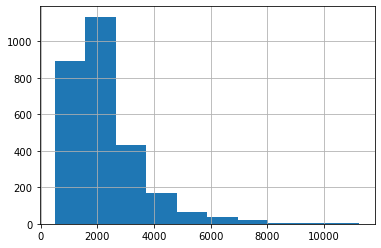

In [37]:
# Plotando um histograma
base.aluguel.hist()

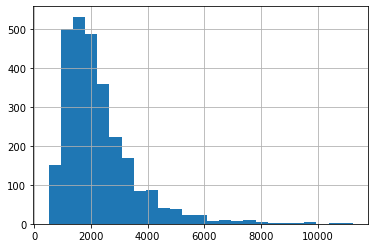

In [38]:
# Melhorando o histograma
base.aluguel.hist(bins=25);

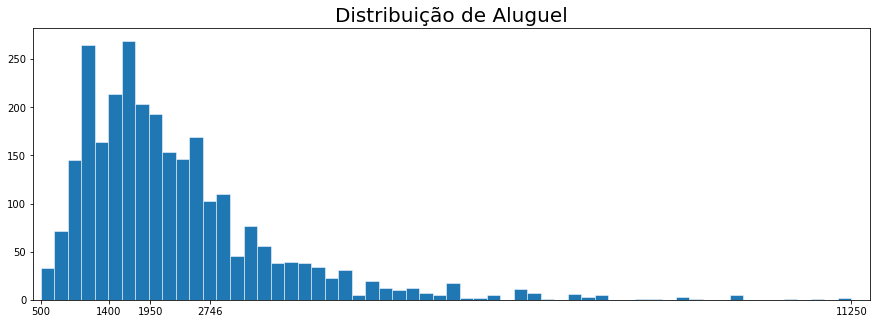

In [39]:
# Melhorando o visual e utilizando o matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(base.aluguel, bins=60, linewidth=0.5, edgecolor='white')
ax.set_title('Distribuição de Aluguel', fontsize=20)
ax.set(xlim=(400, 11500), xticks=[500,1400,1950,2746.5,11250])

plt.show()

In [40]:
# Além disso, também podemos ver quais são os intervalos e o número de valores em cada faixa desse histograma
import numpy as np
np.histogram(base.aluguel, bins=60)

(array([ 33,  72, 145, 265, 164, 214, 269, 203, 193, 154, 146, 169, 103,
        110,  46,  77,  56,  38,  39,  38,  34,  23,  31,   5,  20,  12,
         10,  12,   7,   5,  17,   2,   2,   5,   0,  11,   7,   1,   0,
          6,   3,   5,   0,   0,   1,   1,   0,   3,   1,   0,   0,   5,
          0,   0,   0,   1,   0,   1,   0,   2], dtype=int64),
 array([  500.        ,   679.16666667,   858.33333333,  1037.5       ,
         1216.66666667,  1395.83333333,  1575.        ,  1754.16666667,
         1933.33333333,  2112.5       ,  2291.66666667,  2470.83333333,
         2650.        ,  2829.16666667,  3008.33333333,  3187.5       ,
         3366.66666667,  3545.83333333,  3725.        ,  3904.16666667,
         4083.33333333,  4262.5       ,  4441.66666667,  4620.83333333,
         4800.        ,  4979.16666667,  5158.33333333,  5337.5       ,
         5516.66666667,  5695.83333333,  5875.        ,  6054.16666667,
         6233.33333333,  6412.5       ,  6591.66666667,  6770.8333333

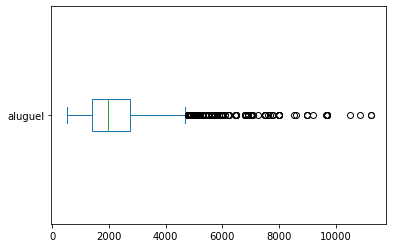

In [41]:
# Uma outra forma de visualizar essa informação é utilizando o boxplot
base.aluguel.plot.box(vert=False);

**Um questionamento, o que faz uma propriedade ser mais cara?**

In [42]:
# Verificando as 10 propriedades de maior valor
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
235,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
1402,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
255,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0


**Podemos perceber que é necessário um novo tratamento na base durante o processo da análise exploratória**

In [43]:
# Verificando se existem valores duplicados na base
base[base.duplicated()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
77,Barra Funda,1060.0,287.0,0.0,14.0,21.0,1382.0,50.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
176,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
250,Belém,1200.0,200.0,20.0,20.0,24.0,1464.0,30.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
267,Paraíso,3400.0,1372.0,360.0,44.0,68.0,5244.0,147.0,3.0,3.0,1.0,4.0,1.0,0.0,1.0
306,Perdizes,2150.0,0.0,0.0,28.0,43.0,2221.0,72.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,Vila Nova Conceição,3090.0,900.0,184.0,40.0,61.0,4275.0,85.0,2.0,2.0,1.0,12.0,1.0,0.0,0.0
2770,Aclimação,2200.0,0.0,72.0,37.0,44.0,2353.0,90.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0
2771,Santa Cecília,1120.0,280.0,0.0,15.0,22.0,1437.0,32.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0
2773,Aclimação,1100.0,308.0,16.0,14.0,22.0,1460.0,30.0,1.0,1.0,0.0,7.0,1.0,0.0,1.0


In [44]:
# Eliminando esses valores
base = base.drop_duplicates(keep='last')

In [45]:
# Verificando novamente o top 10 alugueis
base.sort_values('aluguel', ascending=False).head(10)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
2305,Vila Nova Conceição,11250.0,0.0,584.0,187.0,225.0,12250.0,300.0,4.0,4.0,3.0,0.0,1.0,0.0,0.0
1581,Jardim Paulista,10870.0,2008.0,575.0,138.0,217.0,13810.0,190.0,3.0,4.0,1.0,1.0,1.0,0.0,1.0
762,Paraíso,10500.0,2425.0,42.0,134.0,210.0,13310.0,200.0,3.0,5.0,2.0,8.0,1.0,1.0,1.0
2723,Jardim Paulista,9700.0,2300.0,416.0,123.0,194.0,12730.0,178.0,3.0,3.0,1.0,2.0,1.0,0.0,0.0
2311,Jardim Paulista,9690.0,1900.0,1000.0,123.0,193.0,12910.0,151.0,3.0,5.0,3.0,5.0,1.0,0.0,1.0
1629,Jardim Paulista,9660.0,1300.0,333.0,123.0,193.0,11610.0,130.0,2.0,2.0,1.0,5.0,1.0,0.0,1.0
387,Itaim Bibi,9200.0,2380.0,694.0,117.0,184.0,12580.0,210.0,4.0,4.0,2.0,11.0,1.0,0.0,0.0
1505,Jardim Paulista,9000.0,2480.0,496.0,115.0,180.0,12270.0,160.0,3.0,4.0,1.0,7.0,1.0,0.0,1.0
2047,Vila Olímpia,8999.0,2300.0,616.0,115.0,179.0,12210.0,128.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0
680,Jardim Paulista,8990.0,1362.0,352.0,114.0,179.0,11000.0,140.0,2.0,3.0,1.0,19.0,1.0,0.0,1.0


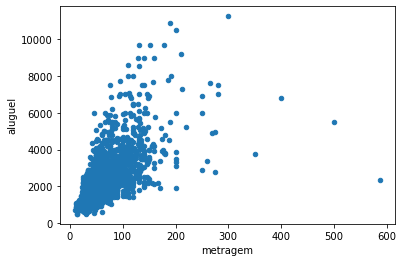

In [46]:
# Será que existe relação entre aluguel e metragem?
base.plot.scatter(x='metragem', y='aluguel');

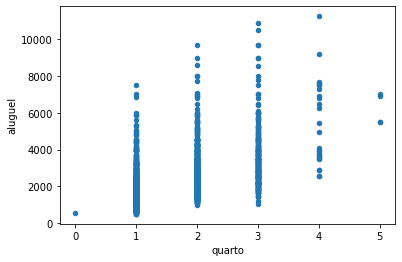

In [47]:
# E entre aluguel e quartos?
base.plot.scatter(x='quarto',y='aluguel');

**Além do próprio pandas e do matplotlib que já vimos, também podemos usar outras bibliotecas para entender melhor os dados**

In [48]:
# Importando o seaborn
import seaborn as sns

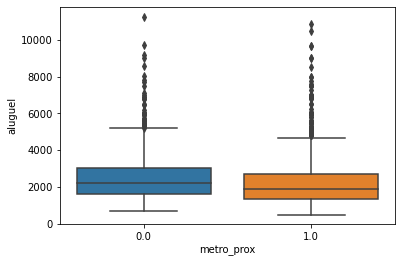

In [49]:
# Qual será a média de aluguel entre propriedades próximas e distantes do metrô?
sns.boxplot(x='metro_prox',y='aluguel',data=base);

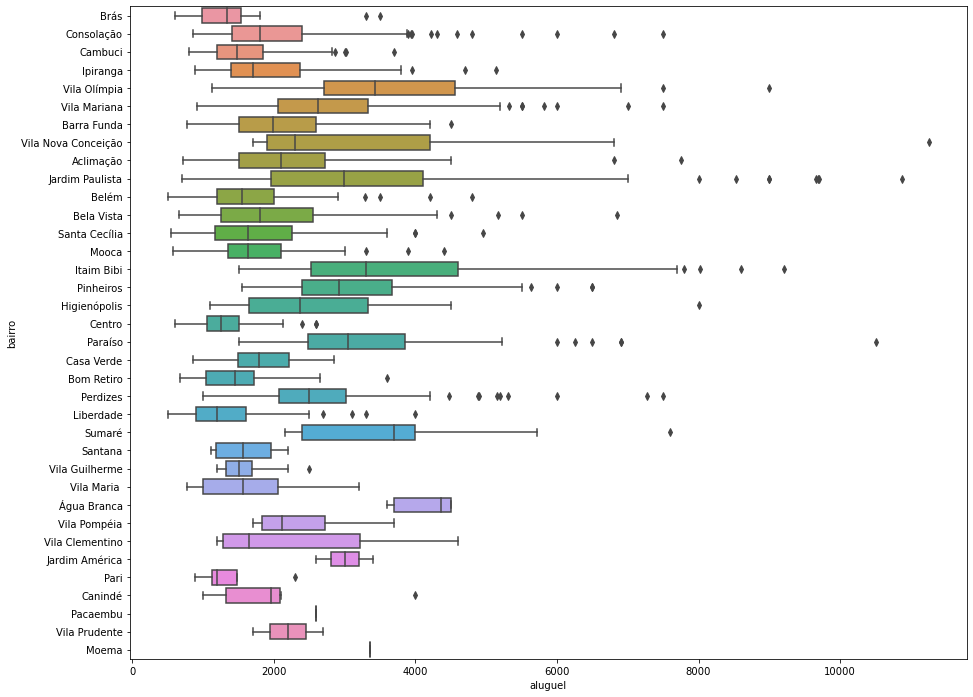

In [50]:
# E se quisermos avaliar o bairro?
fig, ax = plt.subplots(figsize=(15,12))
sns.boxplot(x='aluguel',y='bairro',data=base, orient='h');

In [51]:
# Verificando a quantidade de registros em cada bairro
base.bairro.value_counts()

Consolação             271
Jardim Paulista        190
Bela Vista             187
Santa Cecília          178
Pinheiros              117
Vila Mariana           114
Mooca                   99
Itaim Bibi              87
Cambuci                 86
Liberdade               86
Perdizes                84
Centro                  80
Aclimação               75
Paraíso                 59
Ipiranga                55
Barra Funda             53
Bom Retiro              51
Belém                   35
Brás                    29
Vila Olímpia            29
Higienópolis            28
Casa Verde              24
Vila Guilherme          18
Vila Nova Conceição     14
Vila Pompéia            14
Vila Clementino         10
Sumaré                   9
Santana                  8
Canindé                  6
Vila Maria               6
Água Branca              5
Pari                     4
Jardim América           2
Vila Prudente            2
Pacaembu                 1
Moema                    1
Name: bairro, dtype: int64

**Algo que pode ser feito é incluirmos novas informações na base quando acharmos necessário**

In [52]:
# Importando uma base de bairros x regiões
regioes = pd.read_excel('bairros.xlsx')

In [53]:
# Unindo essas duas bases
base2 = pd.merge(
    base,
    regioes,
    how='left',
    left_on='bairro',right_on='Bairro'
)

In [54]:
# Visualizando novamente a base
base2.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro


**Toda vez que eu adiciono novos dados, eu preciso garantir que nada ficou com valor vazio**

In [55]:
# Filtrando os valores onde a Região é nula
base2[base2.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
234,Vila Maria,3200.0,680.0,68.0,41.0,64.0,4053.0,80.0,2.0,2.0,1.0,7.0,1.0,0.0,0.0,NaN,NaN
820,Vila Maria,850.0,0.0,42.0,15.0,17.0,924.0,40.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1262,Vila Maria,1460.0,220.0,106.0,19.0,29.0,1834.0,70.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
1684,Vila Maria,2200.0,653.0,172.0,28.0,44.0,3097.0,79.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN
1845,Vila Maria,1657.0,1050.0,291.0,21.0,33.0,3052.0,110.0,2.0,3.0,2.0,4.0,1.0,0.0,0.0,NaN,NaN
2227,Vila Maria,772.0,0.0,100.0,13.0,15.0,900.0,45.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [56]:
# Verificando se existe Vila Maria na base que importamos
regioes[regioes.Bairro == 'Vila Maria']

,Bairro,Região
58,Vila Maria,Norte


In [57]:
# Na base, trazendo apenas o nome do bairro
base2.loc[base2.Região.isnull(),'bairro']

234     Vila Maria 
820     Vila Maria 
1262    Vila Maria 
1684    Vila Maria 
1845    Vila Maria 
2227    Vila Maria 
Name: bairro, dtype: object

In [58]:
# Subtituindo a região por norte
base2.loc[base2.Região.isnull(),'Região'] = 'Norte'

In [59]:
# E corrigindo o nome de Vila Maria
base2.loc[base2.bairro == 'Vila Maria ','bairro'] = 'Vila Maria'

In [60]:
# Novamente verificando se ainda existe algum valor nulo
base2[base2.Região.isnull()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região


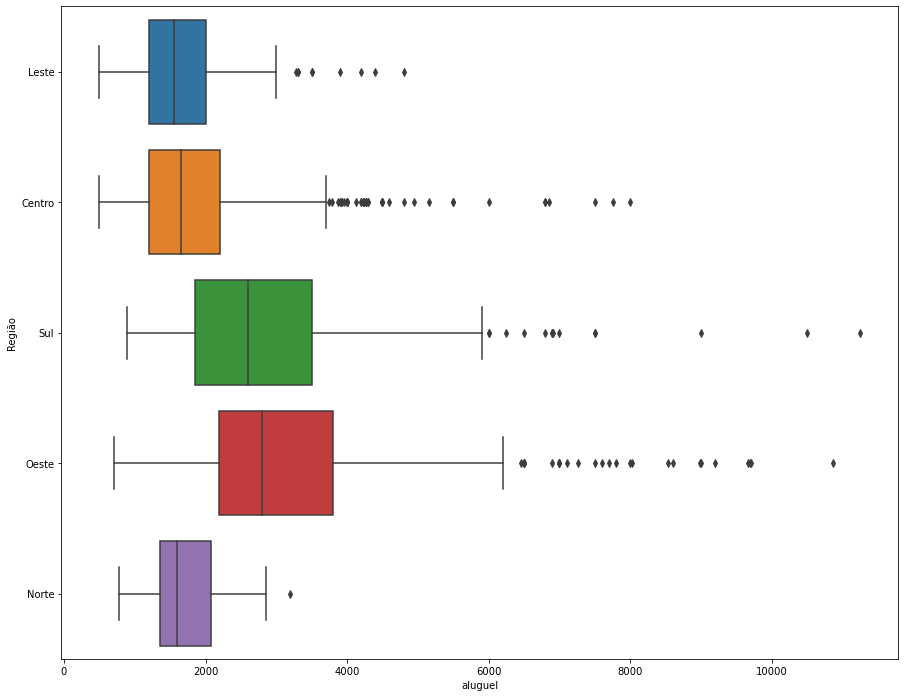

In [61]:
# E agora traçando o gráfico pela região
fig, ax = plt.subplots(figsize=(15,12))
sns.boxplot(x='aluguel',y='Região',data=base2,orient='h');

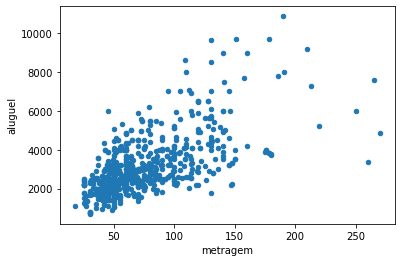

In [62]:
# Será que existe relação entre aluguel e metragem para a REGIÃO OESTE?
base2[base2.Região == 'Oeste'].plot.scatter(x='metragem',y='aluguel');

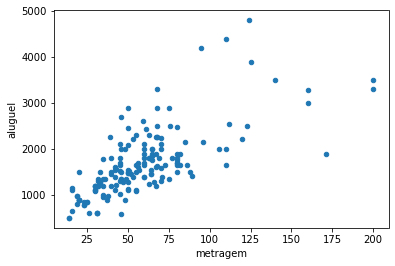

In [63]:
# E para a REGIÃO LESTE
base2[base2.Região == 'Leste'].plot.scatter(x='metragem',y='aluguel');

In [64]:
base = base2

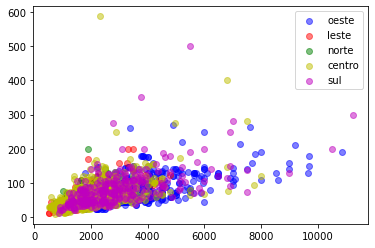

In [65]:
# Plotando todas as figuras em um único gráfico
fig, ax = plt.subplots()

oeste = base[base.Região == 'Oeste']
leste = base[base.Região == 'Leste']
norte = base[base.Região == 'Norte']
centro = base[base.Região == 'Centro']
sul = base[base.Região == 'Sul']

ax.scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5,label='oeste')
ax.scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5,label='leste')
ax.scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5,label='norte')
ax.scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5,label='centro')
ax.scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5,label='sul')

ax.legend()

plt.show()

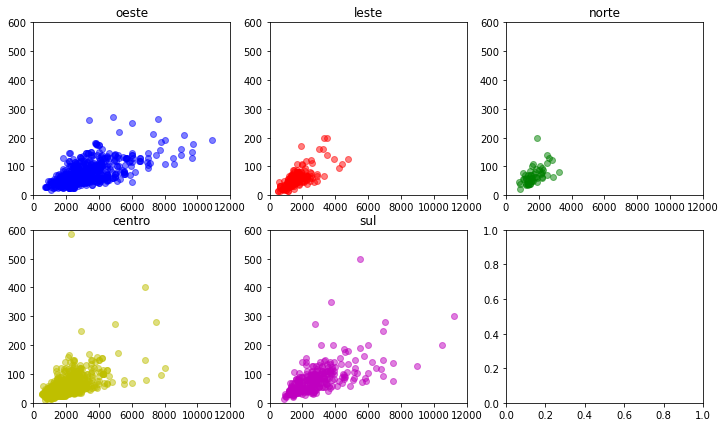

In [66]:
# Criando um gráfico para cada região
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(12,7))

oeste = base[base.Região == 'Oeste']
leste = base[base.Região == 'Leste']
norte = base[base.Região == 'Norte']
centro = base[base.Região == 'Centro']
sul = base[base.Região == 'Sul']

ax[0,0].scatter(oeste.aluguel, oeste.metragem, c='b',alpha=0.5,label='oeste')
ax[0,1].scatter(leste.aluguel, leste.metragem, c='r',alpha=0.5,label='leste')
ax[0,2].scatter(norte.aluguel, norte.metragem, c='g',alpha=0.5,label='norte')
ax[1,0].scatter(centro.aluguel, centro.metragem, c='y',alpha=0.5,label='centro')
ax[1,1].scatter(sul.aluguel, sul.metragem, c='m',alpha=0.5,label='sul')

ax[0,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,1].set(xlim=(0, 12000),ylim=(0, 600))
ax[0,2].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,0].set(xlim=(0, 12000),ylim=(0, 600))
ax[1,1].set(xlim=(0, 12000),ylim=(0, 600))

ax[0,0].set_title('oeste')
ax[0,1].set_title('leste')
ax[0,2].set_title('norte')
ax[1,0].set_title('centro')
ax[1,1].set_title('sul')

plt.show()

<a id='correlacoes'></a>
**Existe alguma relação entre essas variáveis?**

In [67]:
# Verificando a correlação dessa base
base.corr()

,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
aluguel,1.000000,0.547477,0.028619,0.986592,0.999937,0.180066,0.625594,0.536307,0.645005,0.566189,0.117477,0.090506,0.195236,-0.107808
condominio,0.547477,1.000000,-0.022161,0.478443,0.547217,0.089427,0.410019,0.414734,0.523017,0.566976,0.242036,0.064668,0.115346,0.000910
iptu,0.028619,-0.022161,1.000000,0.043838,0.028759,0.987828,0.054086,0.073957,0.056725,-0.011616,-0.025528,0.012266,-0.010007,0.010633
seguro_incendio,0.986592,0.478443,0.043838,1.000000,0.986566,0.190569,0.662295,0.551111,0.642922,0.559802,0.072388,0.092343,0.181506,-0.122333
taxa_serviço,0.999937,0.547217,0.028759,0.986566,1.000000,0.180184,0.625697,0.536624,0.644766,0.566322,0.117122,0.091285,0.194803,-0.108255
total,0.180066,0.089427,0.987828,0.190569,0.180184,1.000000,0.151059,0.159203,0.160734,0.085004,-0.000086,0.026351,0.020175,-0.003480
metragem,0.625594,0.410019,0.054086,0.662295,0.625697,0.151059,1.000000,0.725122,0.665260,0.448426,-0.060388,0.139389,-0.054571,-0.152064
quarto,0.536307,0.414734,0.073957,0.551111,0.536624,0.159203,0.725122,1.000000,0.663906,0.445602,-0.021817,0.119335,-0.100762,-0.200685
banheiro,0.645005,0.523017,0.056725,0.642922,0.644766,0.160734,0.665260,0.663906,1.000000,0.516650,0.044936,0.070850,-0.014080,-0.142516
vaga_carro,0.566189,0.566976,-0.011616,0.559802,0.566322,0.085004,0.448426,0.445602,0.516650,1.000000,0.193923,0.064124,0.111359,-0.144232


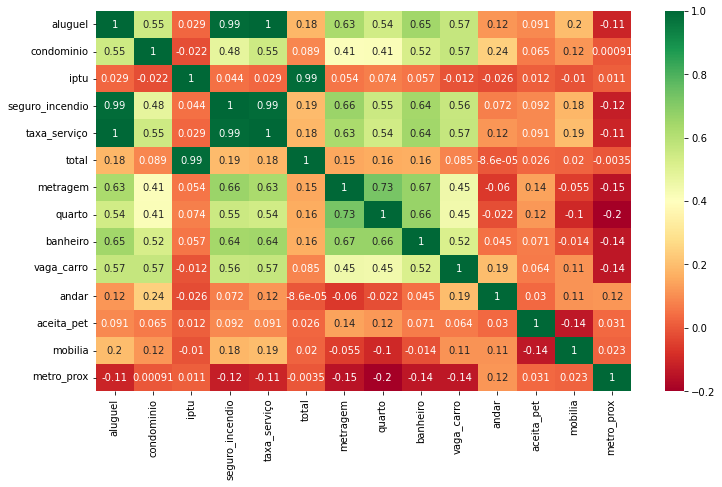

In [68]:
# Podemos tornar essa ifnormação mais visual usando o próprio seaborn
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(base.corr(),annot=True,cmap='RdYlGn')
plt.show()

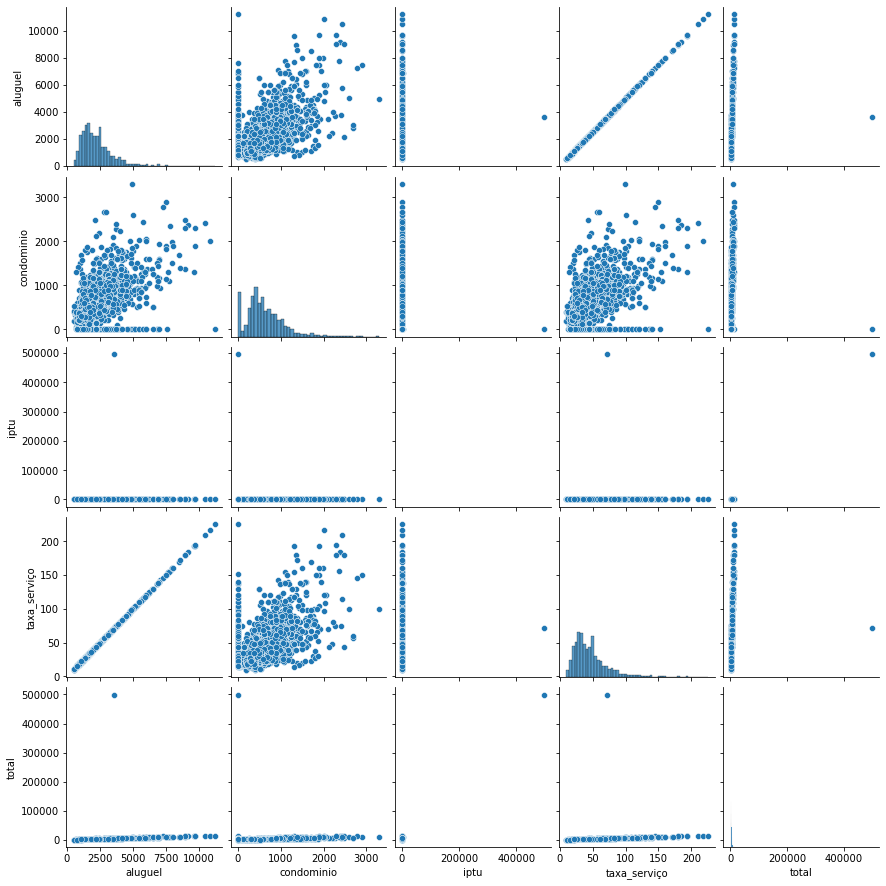

In [69]:
# Além disso podemos ver graficamente a relação entre algumas variáveis
base3 = base[['aluguel','condominio','iptu','taxa_serviço','total']]
sns.pairplot(base3);

In [70]:
# Verificando o outlier do total
base.total.max()

499600.0

In [71]:
# Filtrando essa linha
base[base.total == base.total.max()]

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
1188,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0,Santa Cecília,Centro


In [72]:
# Importando a base novamente para verificar essa informação
verificar = pd.read_csv('quinto_andar_transformed_data.csv')

In [73]:
# Buscando por esse registro
verificar[verificar.iptu == verificar.iptu.max()]

,url,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox
1707,https://www.quintoandar.com.br/imovel/89337922...,Santa Cecília,3600.0,0.0,495800.0,60.0,72.0,499600.0,150.0,4.0,3.0,0.0,0.0,1.0,0.0,1.0


In [74]:
# Tratando esse valor
base.loc[base.total == base.total.max(),'iptu'] = 495.8

In [75]:
base.loc[base.total == base.total.max(),'total'] = 4227.8

**Agora que fizemos esse tratamento podemos [voltar](#correlacoes) e rever as correlações**

<a id='tratamento'></a>
## Tratamento dos Dados

In [76]:
# Visualizando novamente a nossa base
base.head(3)

,bairro,aluguel,condominio,iptu,seguro_incendio,taxa_serviço,total,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Bairro,Região
0,Brás,600.0,450.0,14.0,8.0,12.0,1084.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Brás,Leste
1,Consolação,1790.0,598.0,10.0,23.0,35.0,2456.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Consolação,Centro
2,Cambuci,1550.0,1.0,28.0,26.0,31.0,1636.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Cambuci,Centro


In [77]:
# Verificando a taxa de serviço
base['taxa_ser'] = round((base.taxa_serviço/base.aluguel)*100,2)

In [78]:
# Contando os valores
base.taxa_ser.value_counts()

2.00    1374
1.99     206
1.98     203
1.96     130
1.97     129
1.95      49
1.93      48
1.94      45
1.92      19
1.91      10
1.90       9
1.88       5
2.01       2
2.02       2
2.07       1
1.89       1
2.03       1
Name: taxa_ser, dtype: int64

In [79]:
# Verificando o mesmo para o seguro_incendio
base['taxa_inc'] = round((base.seguro_incendio/base.aluguel)*100,2)

In [80]:
# Contando os valores
base.taxa_inc.value_counts()

1.28    435
1.29    434
1.27    426
1.30    290
1.31    197
1.33    147
1.32     84
1.34     37
1.67     32
1.68     29
1.35     15
1.66     15
1.37     15
1.36     14
1.69     11
1.70     11
1.38     10
1.65      6
1.39      4
1.71      4
1.41      4
1.75      3
1.40      3
1.74      1
1.76      1
0.66      1
0.29      1
1.85      1
1.23      1
0.48      1
1.43      1
Name: taxa_inc, dtype: int64

**A taxa de serviço e o seguro incêndio são percentuais do aluguel, então para ter a taxa é necessário primeiro ter o valor do aluguel.** <br>
**Da mesma forma o total também é a soma dos valores já apresentados então colocar o total seria repetir informação**

In [81]:
# Podemos então apagar essa coluna e a coluna que calculamos o percentual
base = base.drop(['taxa_serviço','taxa_ser','seguro_incendio','taxa_inc'],axis=1)

In [82]:
# Fazendo a mesma lógica para o IPTU
base['taxa_iptu'] = round((base.iptu/base.aluguel),2)

In [83]:
# Contando os valores
base.taxa_iptu.value_counts().head(3)

0.00    671
0.03    228
0.04    189
Name: taxa_iptu, dtype: int64

In [84]:
# Podemos manter a coluna de iptu, mas devemos retirar essa coluna que usamos para calcular
base = base.drop('taxa_iptu',axis=1)

In [85]:
base = base.drop('total',axis=1)

**Alguns modelos não conseguem trabalhar com texto, então também precisamos transformar colunas que estiverem como texto**

In [86]:
# Verificando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 0 to 2233
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bairro      2234 non-null   object 
 1   aluguel     2234 non-null   float64
 2   condominio  2234 non-null   float64
 3   iptu        2234 non-null   float64
 4   metragem    2234 non-null   float64
 5   quarto      2234 non-null   float64
 6   banheiro    2234 non-null   float64
 7   vaga_carro  2234 non-null   float64
 8   andar       2234 non-null   float64
 9   aceita_pet  2234 non-null   float64
 10  mobilia     2234 non-null   float64
 11  metro_prox  2234 non-null   float64
 12  Bairro      2228 non-null   object 
 13  Região      2234 non-null   object 
dtypes: float64(11), object(3)
memory usage: 261.8+ KB


In [87]:
# Primeiro eliminando as 2 colunas de bairro
base = base.drop(['bairro','Bairro'],axis=1)

**Podemos fazer o One Hot Encoding usando o `.get_dummies()` para transformar a coluna de região em novas colunas numéricas e o `.concat()` para unir essas colunas com a nossa base**

In [88]:
# Utilizando o get_dummies
pd.get_dummies(base.Região)

,Centro,Leste,Norte,Oeste,Sul
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
2229,1,0,0,0,0
2230,1,0,0,0,0
2231,0,1,0,0,0
2232,1,0,0,0,0


In [89]:
# Utilizando o concat
base = pd.concat([base,pd.get_dummies(base.Região)],axis=1)

In [90]:
# Visualizando novamente a base
base.head()

,aluguel,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Região,Centro,Leste,Norte,Oeste,Sul
0,600.0,450.0,14.0,31.0,1.0,1.0,0.0,6.0,1.0,0.0,1.0,Leste,0,1,0,0,0
1,1790.0,598.0,10.0,40.0,1.0,1.0,1.0,4.0,1.0,0.0,1.0,Centro,1,0,0,0,0
2,1550.0,1.0,28.0,65.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,Centro,1,0,0,0,0
3,1600.0,0.0,142.0,50.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,Sul,0,0,0,0,1
4,1700.0,1106.0,218.0,74.0,2.0,2.0,1.0,11.0,1.0,0.0,0.0,Sul,0,0,0,0,1


In [91]:
# Podemos então apagar a única variável que está como texto
base = base.drop('Região',axis=1)

<a id='modelo'></a>
## Definição do modelo
- Para falar de algoritmos de Machine Learning, vamos usar outra biblioteca extremamente importante para Ciência de Dados:
    - https://scikit-learn.org/stable/
- Antes de tudo, precisamos pensar em qual problema queremos resolver:

    - Se temos exemplos, com resultados (rótulos / labels), do que queremos prever, estamos falando de **aprendizado supervisionado**
        - **Regressão**: Prever um valor numérico contínio
            - Exemplo: Prever o valor de uma casa, do aluguel, a quantidade de vendas,...
        - **Classificação**: Prever uma classe
            - Exemplo: Prever se a fruta é banana ou maça, se uma transação é fraude, se a pessoa possui ou não uma doença,...
    - Se não temos os valores dos resultados e queremos apenas descobrir estruturas e padrões semelhantes, temos um problema de **aprendizado não supervisionado**
        - Exemplo: Agrupar clientes, definir cesta de produtos, agrupar frutas sem saber qual é maça ou banana,...

**Antes de definir o modelo, o primeiro passo é separar os nossos dados em treino e teste**
- Essa etapa é extremamente importante pois vamos precisar **avaliar a qualidade do nosso modelo** e só conseguimos fazer isso utilizando os dados de teste!
- Vamos utilizar o train_test_split do próprio Scikit-Learn
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [92]:
# Primeiramente vamos separar o que são nossas variáveis preditoras (que vamos usar para fazer a previsão, o nosso X) 
# e a variável alvo (que queremos prever, o y)
X = base.drop('aluguel',axis=1)
y = base.aluguel

In [93]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [94]:
# Separando nossa base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [95]:
# Visualizando X_train
X_train.head(3)

,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
425,320.0,0.0,30.0,1.0,1.0,0.0,3.0,1.0,0.0,1.0,1,0,0,0,0
2168,212.0,27.0,35.0,1.0,1.0,0.0,4.0,0.0,0.0,1.0,1,0,0,0,0
780,430.0,0.0,30.0,1.0,1.0,0.0,15.0,0.0,1.0,1.0,1,0,0,0,0


**Depois de separar nossa base em treino e teste, podemos usar a base de treino para criar o nosso modelo usando diferentes algoritmos**

**Podemos começar usando a Regressão Linear**
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [96]:
# Importando a Regressão Linear
from sklearn.linear_model import LinearRegression

In [97]:
# Treinando o nosso modelo
reg = LinearRegression().fit(X_train, y_train)

In [98]:
# Avaliando o ajuste do modelo aos nossos dados de TREINO
reg.score(X_train, y_train)

0.6538960711729045

**Para cada modelo que criarmos, devemos analisar o erro desse modelo. Faremos isso utilizando os dados de teste.**
**Para analisar erros, o próprio Scikit-Learn já oferece o `metrics`.**
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [99]:
# Importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [100]:
# Fazendo a previsão com o modelo anterior
y_pred = reg.predict(X_test)

In [101]:
# Avaliando o erro
mean_absolute_error(y_test, y_pred)

538.1964404858858

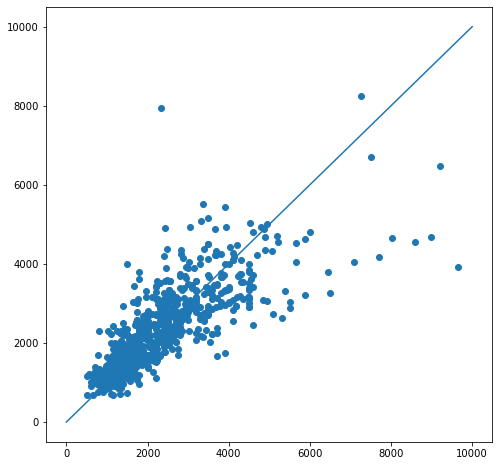

In [102]:
# Visualizando essa diferença graficamente
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_pred)
ax.plot([0,10000],[0,10000])

plt.show()

**Podemos então comparar com outro modelo, como a árvore de decisão**
- https://scikit-learn.org/stable/modules/tree.html#regression

In [103]:
# Importando a árvore de decisão
from sklearn import tree

In [104]:
# Criando o regressor
regArvore = tree.DecisionTreeRegressor(random_state=42)

In [105]:
# Fazendo o fit do modelo
regArvore = regArvore.fit(X_train, y_train)

In [106]:
# Avaliando o modelo
regArvore.score(X_train, y_train)

0.9999982457122238

In [107]:
# Fazendo a previsao
y_predArvore = regArvore.predict(X_test)

In [108]:
# Avaliando o erro para a árvore de decisão
mean_absolute_error(y_test, y_predArvore)

694.8075880758807

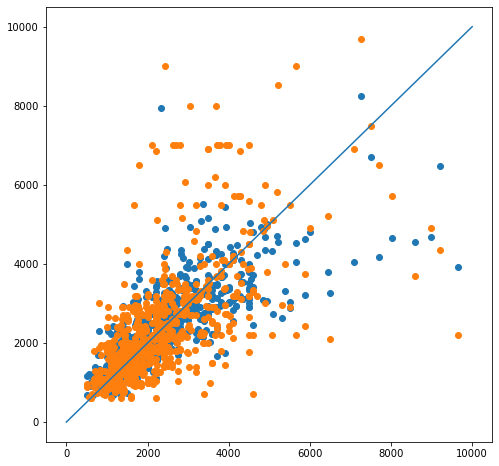

In [109]:
# Visualizando essa diferença graficamente
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_pred)
ax.scatter(y_test, y_predArvore)
ax.plot([0,10000],[0,10000])

plt.show()

**E também avaliar outros erros como o erro quadrático médio**

In [110]:
# Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [111]:
# Avaliando para a regressão
mean_squared_error(y_test, y_pred)

656483.1433293154

In [112]:
# E para a árvore de decisão
mean_squared_error(y_test, y_predArvore)

1304335.344474556

**Podemos buscar novas formas de melhorar o modelo, voltando no processo de tratamento de dados, selecionando novos modelos, eliminando colunas, ajustando os hiperparâmetros, etc**

**E se retirarmos alguma coluna?**

In [115]:
# Relembrando os valores anteriores
print('Regressão Linear')
print('anterior: '+str(mean_absolute_error(y_test, y_pred)))
print('Árvore de Regressão')
print('anterior: '+str(mean_absolute_error(y_test, y_predArvore)))

Regressão Linear
anterior: 538.1964404858858
Árvore de Regressão
anterior: 694.8075880758807


In [116]:
# Podemos selecionar a lista de colunas
colunas = base.drop('aluguel',axis=1).columns
print(colunas)

Index(['condominio', 'iptu', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Centro', 'Leste',
       'Norte', 'Oeste', 'Sul'],
      dtype='object')


In [117]:
# Podemos percorrer toda a lista acima eliminando cada uma das colunas
nomes = ['todas']
regressao = [mean_absolute_error(y_test, y_pred)]
arvore = [mean_absolute_error(y_test, y_predArvore)]

for i in colunas:
    nomes.append(i)
    base_nova = base.drop(i,axis=1)

    # Definindo X e y
    X_novo = base_nova.drop('aluguel',axis=1)
    y_novo = base_nova.aluguel

    # Separando em treino e teste
    X_train_novo, X_test_novo, y_train_novo, y_test_novo = train_test_split(X_novo, y_novo, test_size=0.33, random_state=42)

    # Regressão Linear 
    reg = LinearRegression().fit(X_train_novo, y_train_novo)
    y_pred_novo = reg.predict(X_test_novo)
    regressao.append(mean_absolute_error(y_test_novo, y_pred_novo))

    # Árvore de regressão
    regArvore = regArvore.fit(X_train_novo, y_train_novo)
    y_predArvore_novo = regArvore.predict(X_test_novo)
    arvore.append(mean_absolute_error(y_test_novo, y_predArvore_novo))
    
# Guardando o resultado em um DataFrame
resultado = pd.DataFrame([regressao,arvore])
resultado.columns = nomes

In [118]:
# Visualizando esse resultado
resultado

,todas,condominio,iptu,metragem,quarto,banheiro,vaga_carro,andar,aceita_pet,mobilia,metro_prox,Centro,Leste,Norte,Oeste,Sul
0,538.196440,536.829189,542.782620,553.592480,539.594953,552.284223,547.388788,541.406259,539.125032,551.775677,538.366961,538.196440,538.196440,538.196440,538.196440,538.196440
1,694.807588,657.562331,655.619241,719.846883,689.970190,628.434959,676.191057,685.798555,693.261066,689.040425,674.345528,677.838753,684.445348,676.659892,692.480578,672.445799


**E se mudarmos os parâmetros da árvore de decisão?**

In [119]:
# Criando uma nova árvore de decisão
regArvore2 = tree.DecisionTreeRegressor(random_state=42,criterion='poisson',max_depth=6)
regArvore2 = regArvore2.fit(X_train, y_train)
y_predArvore2 = regArvore2.predict(X_test)
mean_absolute_error(y_test, y_predArvore2)

911.2473439500878

In [121]:
# Percorrendo uma lista de parâmetros
depth = [2,3,4,5,6,7,8,9,10]
criterios = ['friedman_mse','absolute_error','poisson']
menor_valor = mean_absolute_error(y_test, y_predArvore)
menor_i = ''
menor_j = ''

for i in depth:
    for j in criterios:
        regArvore2 = tree.DecisionTreeRegressor(random_state=42,max_depth=i,criterion=j)
        regArvore2 = regArvore2.fit(X_train, y_train)
        y_predArvore2 = regArvore2.predict(X_test)
        valor = mean_absolute_error(y_test, y_predArvore2)
        if valor < menor_valor:
            menor_valor = valor
            menor_i = i
            menor_j = j
            menor_y_predArvore2 = y_predArvore2
        print(mean_absolute_error(y_test, y_predArvore2))
        
print(menor_i,menor_j,menor_valor)

670.785385063755
646.8252032520326
941.7286221114898
655.3251136495958
607.1165311653117
932.3399631231646
598.6517214658842
591.1409214092141
925.2382223289309
589.4597598915631
575.6415989159891
917.4707940809566
596.226135557458
574.8956639566395
911.2473439500878
610.6065021063165
573.6253387533875
899.8707130954759
631.9491127858429
580.2337398373984
900.4985235273358
629.503042223945
576.530487804878
895.6459021072615
631.3580629790811
592.5223577235772
886.7574989543057
7 absolute_error 573.6253387533875


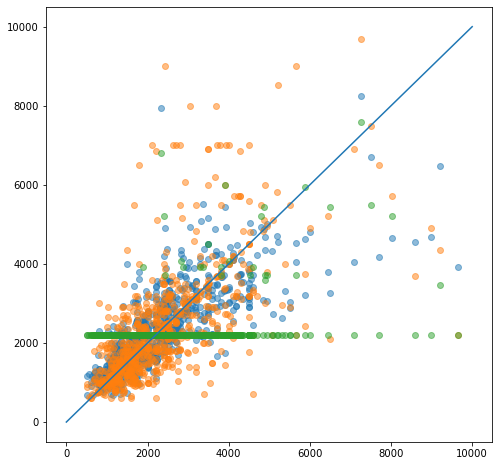

In [122]:
# Visualizando novamente o gráfico
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_pred,alpha=0.5)
ax.scatter(y_test, y_predArvore,alpha=0.5)
ax.scatter(y_test, y_predArvore2,alpha=0.5)
ax.plot([0,10000],[0,10000])

plt.show()

**E se adicionarmos um novo algoritmo?**

In [123]:
# Utilizando Random Forest
from sklearn.ensemble import RandomForestRegressor

In [124]:
# Fazendo a previsão
regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(X_train, y_train)
y_predRF = regr.predict(X_test)

In [125]:
# Analisando o erro
mean_absolute_error(y_test, y_predRF)

503.40558365240247

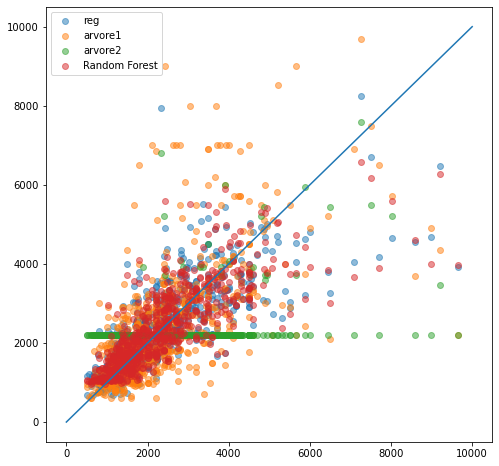

In [126]:
# Visualizando esse último gráfico
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(y_test, y_pred,alpha=0.5,label='reg')
ax.scatter(y_test, y_predArvore,alpha=0.5,label='arvore1')
ax.scatter(y_test, y_predArvore2,alpha=0.5,label='arvore2')
ax.scatter(y_test, y_predRF,alpha=0.5,label='Random Forest')
ax.plot([0,10000],[0,10000])

ax.legend()

plt.show()

<a id='producao'></a>
## Modelo em produção
- Nessa etapa, vamos fazer o que chamamos de **persistir o modelo**, ou seja, fazer ele funcionar além do nosso código
    - https://scikit-learn.org/stable/model_persistence.html?highlight=model+persistence

In [127]:
# Importando o dump do joblib
from joblib import dump

In [128]:
# Fazendo o dump do modelo que queremos usar
dump(regr, 'regressor.joblib')

['regressor.joblib']

In [129]:
# Só para lembrarmos, quais colunas precisamos para o nosso modelo?
X_test.columns

Index(['condominio', 'iptu', 'metragem', 'quarto', 'banheiro', 'vaga_carro',
       'andar', 'aceita_pet', 'mobilia', 'metro_prox', 'Centro', 'Leste',
       'Norte', 'Oeste', 'Sul'],
      dtype='object')